<a href="https://colab.research.google.com/github/MauliaAstuti/Tugas_Kelompok_5_NLP/blob/main/analisis_sentimen_timnas_indonesia_di_era_sty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv to Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv


In [7]:
import pandas as pd

# Membaca file CSV yang sudah diupload
df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')

# Menampilkan 5 baris pertama
df.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


# Import modul

In [8]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
pip install pandas nltk matplotlib scikit-learn keras numpy tensor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.4/343.4 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 17.7 MB/s eta 0:00:00
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71551 sha256=24af1037ed4b66fa1e22665dbaedf1650d96c240fd11c35ee7fccc44bcf35b09
  Stored in directory: /root/.cache/pip/wheels/e4/bf/a5/4555f996fe09316f1bd2112d902c4d219d7dda5f8632cd2bc3
Successfully built tensor


# Pra-proses data

**Membaca data**

In [9]:
df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')
df.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


**cek missing value dan duplikat**

In [10]:
print('Missing value:')
print(df.isnull().sum())

print('\n\nData duplikat:')
print(df.duplicated().sum())

Missing value:
komentar    0
label       0
dtype: int64


Data duplikat:
4


**buang data duplikat**

In [11]:
df.drop_duplicates()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,Naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


**Mengubah semua huruf menjadi huruf kecil**

In [12]:
df['komentar'] = df['komentar'].str.lower()

**Menghapus tanda baca**

In [13]:
def remove_punctuation(words):
    return words.translate(str.maketrans('','',string.punctuation))
df['komentar'] = df['komentar'].apply(remove_punctuation)

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Menghapus stopword**, yaitu kata-kata yang tidak terlalu mempengaruhi sentimen

In [16]:
stop_word = [
    'yg',
    'yang',
    'di',
    'ini',
    'dan',
    'aja',
    'username',
    'itu',
    'ya'
]

def remove_stop_word(words):
    return [word for word in words if word not in stop_word]

df['komentar'] = df['komentar'].apply(word_tokenize)

df['komentar'] = df['komentar'].apply(remove_stop_word)

# Join lagi untuk melakukan EDA
df['komentar'] = df['komentar'].apply(' '.join)

# Exploratory Data Analysis (EDA)

**Menganalisa contoh komentar positif dan negatif**

In [17]:
for i in range(1,11):
    print('email #', i)
    komentar_positif = df[df['label'] == 'positif']['komentar'].iloc[i]
    print(komentar_positif + '\n')

email # 1
indonesia 02 libya sty pasti berbenah baik taktik amp susunan pemain tapi libya sepertinya masih akan unggul strategibola tebakskor indonesia libya

email # 2
suka tidak suka coach sty lah berhasil membawa gairah positif untuk timnas level senior karena sejak evan dimas cs berhasil juala aff u19 orang2 cenderung lebih mengikuti timnas level junior ketimbang senior karena peforma timnas senior waktu jelek

email # 3
paling kerja keras tinggi menurut sty kalau lokal ada 2 pemainasnawi pratama arhan dia sering bikin contoh 2 pemain ketika ngelatih timnas kelompok umur arhan pas masih sering main emang ggsalah pilih klub dia

email # 4
salah satu alasan juga knp klub2 korea ttp ngelirik asnawi krn dari data statistik mereka pasti asnawi msh terhitung bagus buat standar kuota pemain asing bukan masalah koneksi sty dll arhan juga trmasuk kategori

email # 5
tolonglah sty ngelath dri rank 170an tekhnik pasing operan dasar masih ajarin latihan timnas seharusnya akademi ssb klub masin

Dari 10 contoh yang diberikan, dapat dilihat bahwa komentar dengan sentimen positif ditandai dengan rasa kepercayaan yang tinggi kepada pelatih, apresiasi pencapaian pelatih, kekaguman terhadap pelatih, serta terkesan membela timnas yang dilatih oleh STY.

In [18]:
for i in range(1,11):
    print('email #', i)
    komentar_negatif = df[df['label'] == 'negatif']['komentar'].iloc[i]
    print(komentar_negatif + '\n')

email # 1
keturunan lain gak main bola emang bisa naturalisasi istimewa kepentingan negara sesuatu subjektif tergantung petingginya akal akalan naturalisasi biasa wajib bisa bahasa indonesia

email # 2
uda botak keturunan penjajah sok si paling paham tentang bola lu coach mentok karir ngelatih futsal sok oke lu anjing

email # 3
belum tentu gak semuanya jadi pemain bola milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas kalau pssi cuma fokus ke pemain keturunan mah sama mempersempit kolam mereka sendiri

email # 4
lu nya bego makanya nonton sendiri tolol persepsi orang beda nggak harus sama bego memang coach tolol sty tolol out udah

email # 5
saya punya saran kepada kita terkenal dengan pola permainan cepat jika dihilangkan maka bahaya besar dalam persepak bolaan kita jadi mohon disampaikan ke ciri khas permainan kita

email # 6
sty ga coba asnawi jadi gelandang vo2 max nya paling tinggi loh diantara pemain timnas

email # 7
bukan masalah bnyak kesempatan ti

Dari 10 contoh komentar negatif, dapat dilihat bahwa komentar bersentimen negatif mengandung kata-kata kasar, terkesan tidak percaya strategi pelatih, mempermasalahkan pemain keturunan (atau naturalisasi), dan tidak jarang meminta pelatih STY untuk tidak melatih timnas.

**Perbandingan data positif dan data negatif**

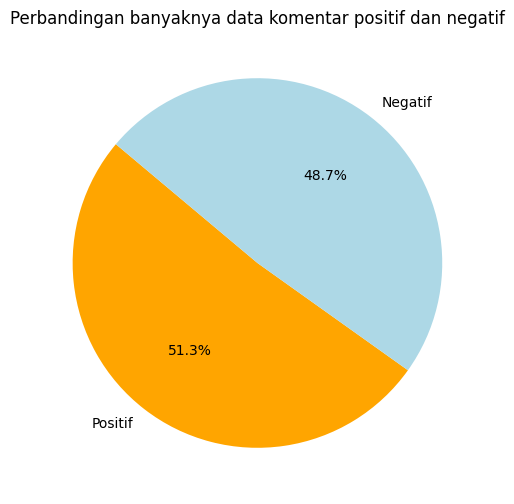

In [19]:
jumlah_komentar = df['label'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(jumlah_komentar, labels=['Positif', 'Negatif'], autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue'])
plt.title('Perbandingan banyaknya data komentar positif dan negatif')
plt.show()

In [20]:
# Pisahkan komentar positif dan negatif
komentar_positif = df[df['label'] == 'positif']['komentar']
komentar_negatif = df[df['label'] == 'negatif']['komentar']

kata_positif = Counter()
komentar_positif.apply(lambda x: kata_positif.update(x.split()))

kata_negatif = Counter()
komentar_negatif.apply(lambda x: kata_negatif.update(x.split()))

# mengetahui 10 kata yang paling sering digunakan
top_kata_positif = kata_positif.most_common(10)
top_kata_negatif = kata_negatif.most_common(10)

top_kata_positif_df = pd.DataFrame(top_kata_positif, columns=['Kata','Frekuensi'])
top_kata_negatif_df = pd.DataFrame(top_kata_negatif, columns=['Kata','Frekuensi'])

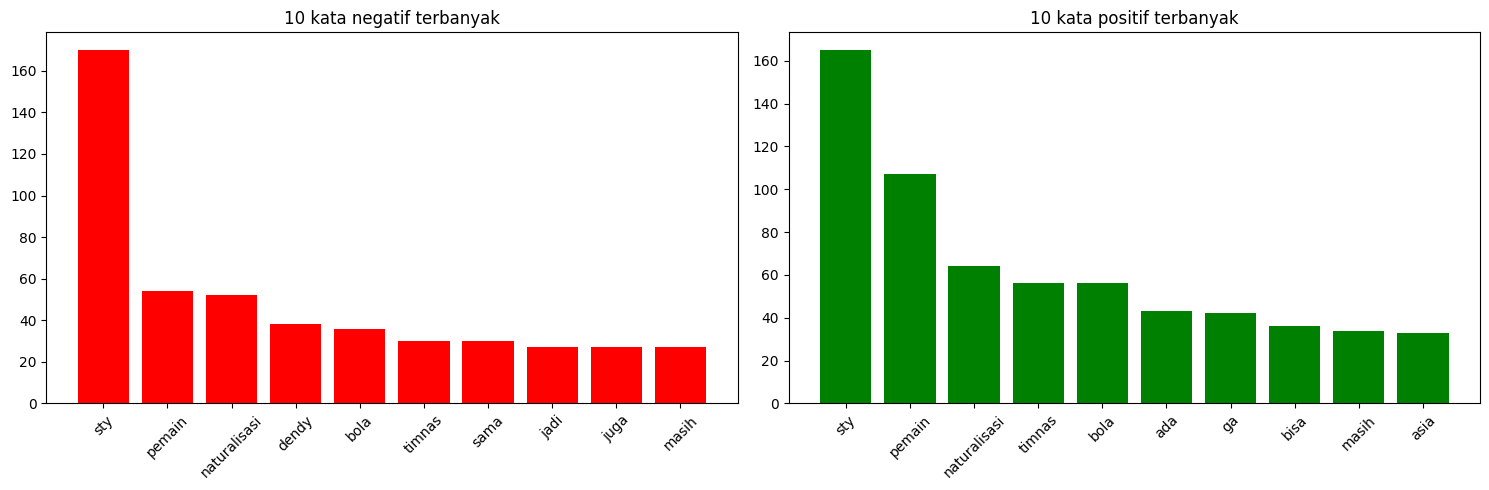

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(top_kata_negatif_df['Kata'], top_kata_negatif_df['Frekuensi'], color='red')
plt.title('10 kata negatif terbanyak')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(top_kata_positif_df['Kata'], top_kata_positif_df['Frekuensi'], color='green')
plt.title('10 kata positif terbanyak')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Feature engineering

**Membagi data training dan testing**

In [22]:
X = df['komentar']
y = df['label']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=7)

**Tokenization atau penguraian kalimat menjadi kata**

In [23]:
max_kata = 1000
tokenizer = Tokenizer(num_words=max_kata)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

**Padding, yaitu penyetaraan banyak kata tiap komentar**

agar tidak bingung menentukan angkanya, maka dapat dilihat terlebih dahulu mediannya

In [24]:
panjang_sequences = [len(seq) for seq in X_train_seq]

median = np.median(panjang_sequences)

print("Median data training: ",median)

Median data training:  17.0


Saya akan mengambil angka 20

In [25]:
max_panjang = 20

X_train_padded = pad_sequences(X_train_seq, maxlen=max_panjang, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_panjang, padding='post')

**Label Encoding**

In [26]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Pembuatan model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_kata , output_dim=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train_padded,
    y_train_encoded,
    epochs=30,
    batch_size=8,
    validation_data=(X_test_padded, y_test_encoded),
    verbose=2,
)

Epoch 1/30
40/40 - 9s - 213ms/step - accuracy: 0.5723 - loss: 0.6887 - val_accuracy: 0.5625 - val_loss: 0.6856
Epoch 2/30
40/40 - 1s - 24ms/step - accuracy: 0.6824 - loss: 0.6322 - val_accuracy: 0.5875 - val_loss: 0.6936
Epoch 3/30
40/40 - 1s - 22ms/step - accuracy: 0.8176 - loss: 0.4725 - val_accuracy: 0.6500 - val_loss: 0.6595
Epoch 4/30
40/40 - 1s - 13ms/step - accuracy: 0.9088 - loss: 0.2270 - val_accuracy: 0.6375 - val_loss: 1.0908
Epoch 5/30
40/40 - 1s - 15ms/step - accuracy: 0.9560 - loss: 0.1656 - val_accuracy: 0.6875 - val_loss: 0.9546
Epoch 6/30
40/40 - 1s - 14ms/step - accuracy: 0.9811 - loss: 0.1092 - val_accuracy: 0.6875 - val_loss: 1.2566
Epoch 7/30
40/40 - 1s - 14ms/step - accuracy: 0.9717 - loss: 0.0848 - val_accuracy: 0.6750 - val_loss: 1.4977
Epoch 8/30
40/40 - 1s - 13ms/step - accuracy: 0.9748 - loss: 0.0785 - val_accuracy: 0.6625 - val_loss: 1.1326
Epoch 9/30
40/40 - 1s - 14ms/step - accuracy: 0.9811 - loss: 0.0655 - val_accuracy: 0.6750 - val_loss: 1.6529
Epoch 10/

**Grafik plot**

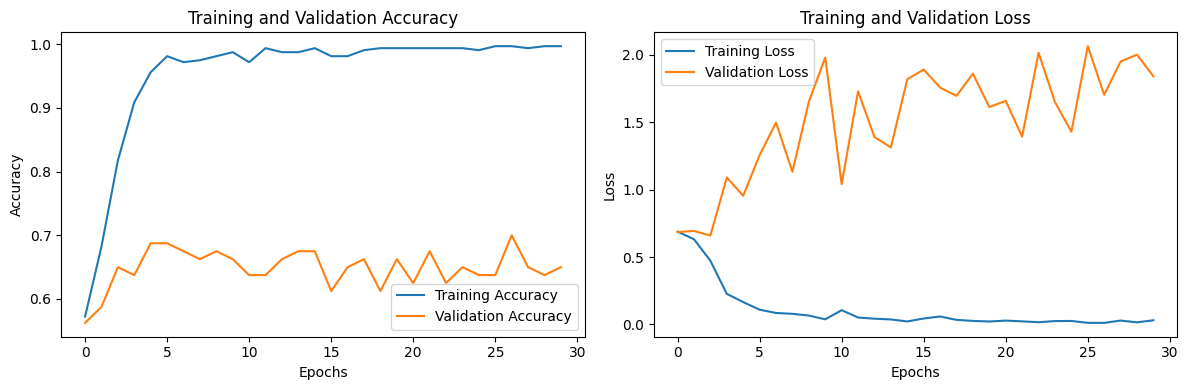

In [28]:
# Mendapatkan riwayat pelatihan
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Dari grafik yang terbentuk, dapat diketahui bahwa model yang dibuat tidak terlalu baik karena mengalami *overfitting* sehingga diperlukan percobaan lagi untuk mendapatkan hasil yang maksimal